<a href="https://colab.research.google.com/github/Joe-kariuki96/Sentiment-Analysis-of-Movie-Reviews-By-Applying-TF-IDF/blob/main/nlp_sentiment_analysis_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [ ]:
import os

In [ ]:
!pwd

/content


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] ='/content'

In [ ]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 142MB/s]


In [ ]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [ ]:
train_fname= 'data/train.tsv.zip'
test_fname = 'data/test.tsv.zip'
sub_fname = 'data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

### Load the train, test, and submission files using Pandas

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_fname, sep='\t')

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
raw_df.Phrase.sample(10).values

array(['of sons', 'This odd , distant Portuguese import more or less',
       'how bad this movie was', 'without',
       'to question an ancient faith',
       "Maybe it is formula filmmaking , but there 's nothing wrong with that if the film is well-crafted and this one is",
       'the right ways',
       'Mr. Polanski is in his element here : alone , abandoned , but still consoled by his art , which is more than he has ever revealed before about the source of his spiritual survival',
       'sharp and', 'of hitting the audience over the head with a moral'],
      dtype=object)

In [ ]:
test_df = pd.read_csv(test_fname, sep='\t')

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
sub_df = pd.read_csv(sub_fname)

In [ ]:
raw_df.	Sentiment.value_counts(normalize=True)

Sentiment
2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: proportion, dtype: float64

<Axes: xlabel='Sentiment'>

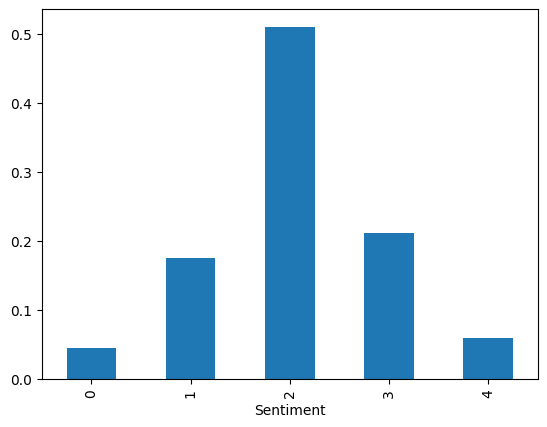

In [ ]:
raw_df.	Sentiment.value_counts(normalize=True).sort_index ().plot(kind='bar')

The bar graph above shows that the
Neutral sentiment (Sentiment 2) dominates the dataset with a proportion of 51%, indicating a balanced range of sentiments. Somewhat positive sentiments (Sentiment 3) follow at 21%, suggesting prevalent positivity, though less pronounced than neutral. Somewhat negative sentiments (Sentiment 1) constitute 17%, reflecting a moderate presence of negativity. Positive sentiment (Sentiment 4) makes up 6%, indicating positivity, though less often. Negative sentiment (Sentiment 0) is the least prevalent at 4.5%, indicating rare instances of strong negativity.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud  # Import the WordCloud class from the wordcloud library

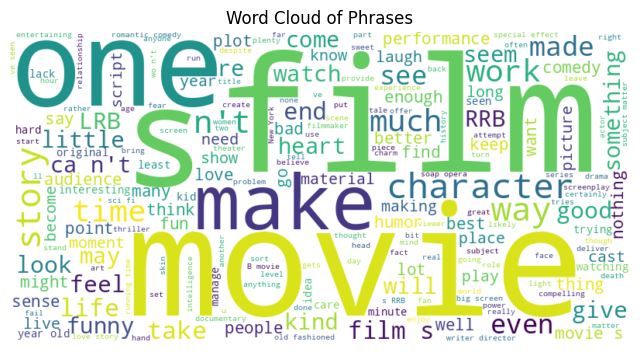

In [ ]:
# Visualization 2: Word Cloud for Most Frequent Phrases
text = ' '.join(raw_df['Phrase'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Phrases')
plt.show()


Larger and more prominent words in the word cloud indicate higher frequency or importance, while smaller words are less frequent. In this case, phrases such as movie, film, and character have high frequency in the dataset as compared to phrases such as show, humor, and performance in the dataset.

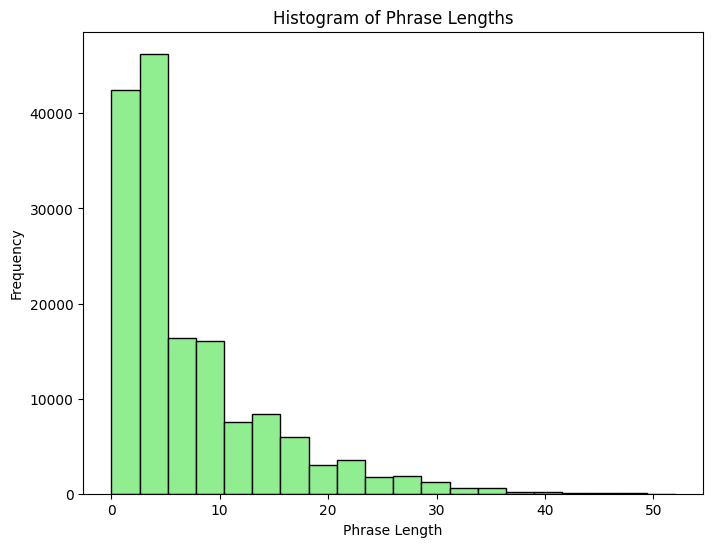

In [ ]:
# Visualization 3: Histogram for Phrase Lengths
phrase_lengths = raw_df['Phrase'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
plt.hist(phrase_lengths, bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Phrase Lengths')
plt.xlabel('Phrase Length')
plt.ylabel('Frequency')
plt.show()

The histogram above illustrates the distribution of phrase lengths, revealing an inverse relationship between phrase length and frequency. Shorter phrases occur more frequently, forming the bulk of the data on the left side of the histogram, while longer phrases are less common and contribute to the rightward tail of the distribution. This pattern indicates a right-skewed distribution, where the majority of data is concentrated on the left side, with a decreasing occurrence of longer phrases towards the right.

In [ ]:
import seaborn as sns

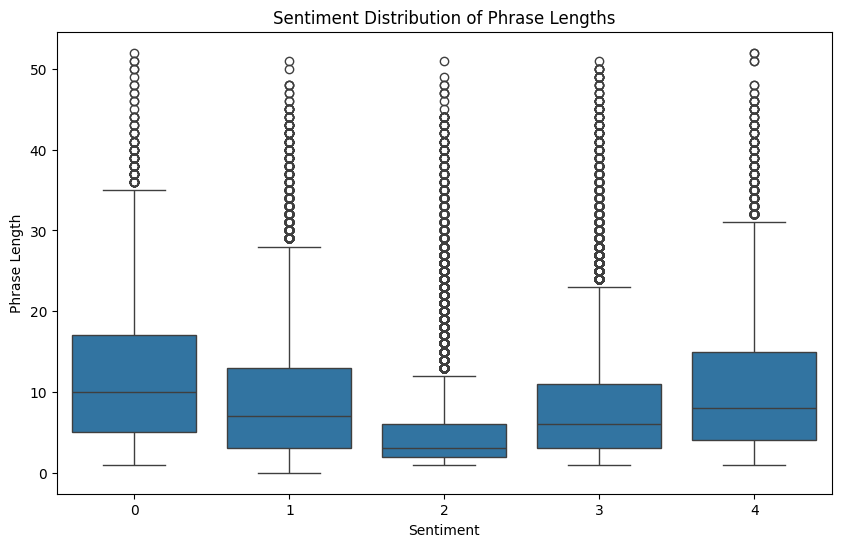

In [ ]:
# Box Plot: Sentiment Distribution of Phrase Lengths
plt.figure(figsize=(10, 6))
sns.boxplot(data=raw_df, x='Sentiment', y=raw_df['Phrase'].apply(lambda x: len(x.split())))
plt.title('Sentiment Distribution of Phrase Lengths')
plt.xlabel('Sentiment')
plt.ylabel('Phrase Length')
plt.show()

The box plots above show that the distribution across all sentiment labels leans towards positive skewness, evident in longer upper whiskers and compact clustering of somewhat negative to neutral sentiments. This skewness indicates a prevalence of strongly positive sentiments, with fewer extreme negative values. Longer upper whiskers suggest a higher frequency of strongly positive sentiments, while shorter distances between Q1 and Q2 imply tighter clustering of somewhat negative to neutral sentiments. Overall, the dataset exhibits a prevalence of positive sentiments, with fewer instances of strongly negative sentiments.

Summarize your insights and learnings from the dataset below:

* The training set has 156060 rows and 4 columns while the test set has 66292 rows and 3 columns.

* Majority of the sentiments in the dataset were neutral while negative sentiment was the least in the dataset.

* Shorter phrases appeared more in the dataset as compared to longer phrases.

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.tokenize import wordpunct_tokenize

In [ ]:
stemmer = SnowballStemmer(language ='english')

In [ ]:
def tokenize (text):
    return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
english_stopwords= stopwords.words('english')

In [ ]:
','.join(english_stopwords [:115])

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some"

In [ ]:
select_stopwords = (english_stopwords [:115])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(tokenizer = tokenize,
                             stop_words =select_stopwords,
                             ngram_range=(1,2),
                             max_features=2000)

In [ ]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7fde0c85be20>)

In [ ]:
len(vectorizer.vocabulary_)

2000

In [ ]:
vectorizer.get_feature_names_out () [:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [ ]:
input = vectorizer.transform(raw_df.Phrase)

In [ ]:
input.shape

(156060, 2000)

In [ ]:
input.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
test_df['Phrase'].fillna('', inplace=True)

In [ ]:
test_inputs= vectorizer.transform(test_df.Phrase)

In [ ]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
input

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 473102 stored elements in Compressed Sparse Row format>

In [ ]:
TRAIN_SIZE = 110_000

In [ ]:
train_inputs=input[:TRAIN_SIZE]
train_targets = raw_df.	Sentiment[:TRAIN_SIZE]

In [ ]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [ ]:
val_inputs=input[TRAIN_SIZE:]
val_targets = raw_df.	Sentiment[TRAIN_SIZE:]

In [ ]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

### Train Logistic Regression Model



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(max_iter=1000)

In [ ]:
model.fit(train_inputs,train_targets)

LogisticRegression(max_iter=1000)

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [ ]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_preds, train_targets)

0.6391909090909091

In [ ]:
val_preds = model.predict(val_inputs)

In [ ]:
accuracy_score(val_preds, val_targets)

0.5792661745549283

### Study Predictions on Sample Inputs

In [ ]:
small_df = raw_df.sample(20)

In [ ]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
45809,45810,2227,splashy and,3
70690,70691,3603,the element,2
40372,40373,1932,speculative effort,3
43383,43384,2098,"Too slow for a younger crowd , too shallow for...",1
25691,25692,1173,little to be learned from watching ` Comedian ',1
62217,62218,3145,Extreme Generation ',2
136932,136933,7405,fearful,1
137177,137178,7419,tailor-made,3
87728,87729,4555,amoral,1
38704,38705,1844,"aspired to , including the condition of art",2


In [ ]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [ ]:
small_inputs.shape

(20, 2000)

In [ ]:
small_preds = model.predict(small_inputs)

In [ ]:
small_preds

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2])

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score



In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
test_inputs

<66292x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 181513 stored elements in Compressed Sparse Row format>

In [ ]:
test_preds = model.predict(test_inputs)

In [ ]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [ ]:
sub_df.Sentiment = test_preds

In [ ]:
sub_df.to_csv('submission.csv',index=None)

In [ ]:
!head submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,3
156066,3
156067,3
156068,2
156069,3


## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional:
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips:

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a Random Forest Classifier model
model1 = RandomForestClassifier(random_state=42)

In [ ]:
# Train the model on the training data
model1.fit(train_inputs,train_targets)

RandomForestClassifier(random_state=42)

In [ ]:
# making prediction on the training input
train_preds1 = model1.predict(train_inputs)

In [ ]:

# Evaluate the accuracy of the random forest classifier model
accuracy = accuracy_score(train_preds1, train_targets)
print("Random Forest Classifier Accuracy:", accuracy)

Random Forest Classifier Accuracy: 0.7902727272727272


In [ ]:
# making prediction on the training input
val_preds1=model1.predict(val_inputs)

In [ ]:
# Evaluate the accuracy of the random forest classifier model
accuracy = accuracy_score(val_preds1, val_targets)
print("Random Forest Classifier Accuracy  on val:", accuracy)

Random Forest Classifier Accuracy  on val: 0.5610290924880591


In [ ]:
test_preds1 = model1.predict(test_inputs)

In [ ]:
test_preds1

array([2, 2, 2, ..., 2, 2, 1])

In [ ]:
sub_df.Sentiment = test_preds1

In [ ]:
sub_df.to_csv('submission.csv',index=None)

### Model 2

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Create a Gradient Boosting Classifier model
model2 = GradientBoostingClassifier(random_state=42)

In [ ]:
# Train the model on the training data
model2.fit(train_inputs,train_targets)

GradientBoostingClassifier(random_state=42)

In [ ]:
# making prediction on the training input
train_preds2 = model2.predict(train_inputs)

In [ ]:
# Evaluate the accuracy of the random forest classifier model
accuracy = accuracy_score(train_preds2, train_targets)
print("Gradient Boosting Classifier Accuracy:", accuracy)

Gradient Boosting Classifier Accuracy: 0.5604363636363636


In [ ]:
# making prediction on the training input
val_preds2=model2.predict(val_inputs)

In [ ]:
# Evaluate the accuracy of the random forest classifier model
accuracy = accuracy_score(val_preds2, val_targets)
print("Val Gradient Boosting  Accuracy  on val:", accuracy)

Val Gradient Boosting  Accuracy  on val: 0.5191272253582284


In [ ]:
test_preds2 = model2.predict(test_inputs)

In [ ]:
test_preds2

array([2, 2, 2, ..., 2, 2, 1])

In [ ]:
sub_df.Sentiment = test_preds2

In [ ]:
sub_df.to_csv('submission.csv',index=None)

Best Model:

The best model out of the three was logistic regression model. This may due to the following reason:
1. Linear Assumption: Logistic regression models assume a linear relationship between the features and the target variable. In some cases, sentiment analysis datasets may exhibit a linear relationship between the features (e.g., words, phrases) and sentiment labels. If the relationship in the dataset is approximately linear, logistic regression may perform better.

2. Data Imbalance: If the sentiment analysis dataset is imbalanced, with one sentiment label being significantly more prevalent than others, logistic regression may perform better at classifying the majority class due to its simplicity and handling of imbalanced data.

3. Overfitting: Random forest and gradient boosting models have more parameters to tune and may be prone to overfitting, especially if not properly tuned. Logistic regression, being a simpler model, may generalize better to unseen data and exhibit less overfitting.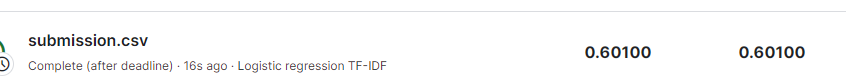

(include Kaggle score screenshot)

## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
